In [29]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import seaborn as sns
sns.set(context='paper', style='whitegrid', font_scale=1.75)
from visualize import *
import plot_help as db
import cv2


In [30]:
import matlab.engine
eng = matlab.engine.start_matlab()


In [31]:
dirname = '../figures/'
#os.makedirs(dirname, exist_ok=True)
save_figs = True
def save(n, ext='.png', save_figs=True, **kwargs):
    if save_figs==True:
        kwargs.setdefault('bbox_inches', 'tight')
        kwargs.setdefault('pad_inches', 0)
        kwargs.setdefault('transparent', True)
        plt.savefig(os.path.join(dirname, n + ext), **kwargs)


In [32]:
def get_all_particles(path_dict,iteration):
    res_dict = {}
    for key, value in path_dict.items():
        pickle_in = open(os.path.join(value,"data/iter_"+str(iteration)+".pickle"),"rb")
        data = pickle.load(pickle_in)
        res_dict[key] = data
    return res_dict

In [3]:
exp_path = '/nfs/data/michaela/projects/OptSync/'
res_path = {
    'MMD+guassian+noise':exp_path+'2077_new_exp',
    'MMD+gaussianquaternion+noise':exp_path+'2078_new_exp',
    'MMD+laplacequaternion':exp_path+'2079_new_exp',
    'MMD+gaussian':exp_path+'2080_new_exp',
    'MMD+laplacequaternion+noise':exp_path+'2081_new_exp',
    'MMD+gaussianquaternion':exp_path+'2082_new_exp',
    #'Sinkhorn':exp_path+'2091_new_exp',
    #'MMD+gaussian_2':exp_path+'2089_new_exp',
    
}
colors = sns.color_palette("Set1", n_colors=len(res_path), desat=.7)

color_dict ={}
for i, key in enumerate(res_path.keys()):
    color_dict[key] = colors[i]

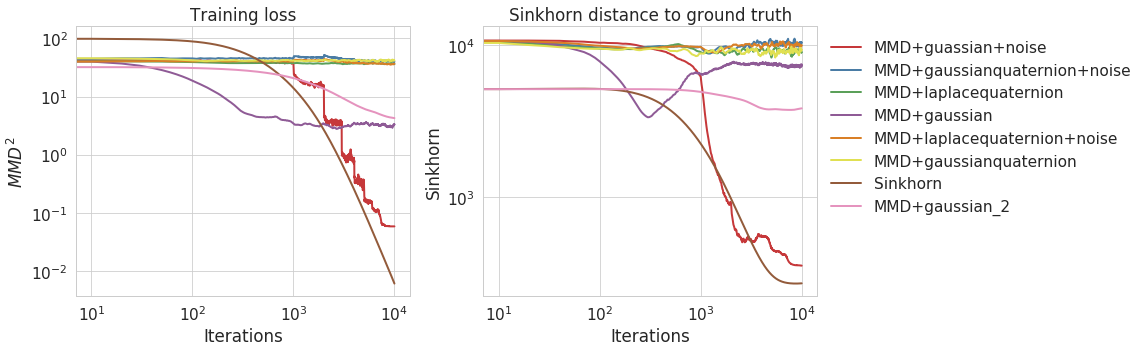

In [6]:
num_fig = 2
fig, ax = plt.subplots(1,num_fig, figsize=(8*num_fig,5))

value = 'loss'
xaxis = 'iteration'
refresh=  False
plot_from_dict(ax[0],xaxis, value, res_path, color_dict,refresh=refresh)
ax[0].set_title('Training loss')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$MMD^2$')
ax[0].set_xlabel('Iterations')
#ax[0].legend()

value = 'eval_dist'
xaxis = 'iteration'
plot_from_dict(ax[1],xaxis,  value, res_path, color_dict,refresh=refresh)
ax[1].set_title('Sinkhorn distance to ground truth')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylabel('Sinkhorn')
ax[1].set_xlabel('Iterations')
ax[1].legend(bbox_to_anchor=(1., 1.),frameon=False)
fig.tight_layout()
filename = 'loss_toy_data'
save(filename)


In [8]:
exp_path = '/nfs/data/michaela/projects/OptSync/'
exp_name  = '_toy_exp'
res_path_prod_particles_no_weights = {
    'MMD: Euclidean':exp_path+'2114'+exp_name,
    'MMD= PowerQuaternion':exp_path+'2110'+exp_name,
    'Sinkhorn: Euclidean':exp_path+'2115'+exp_name,
    'Sinkhorn: PowerQuaternion':exp_path+'2105'+exp_name,
}
res_path_prod_particles_with_weights = {
    'MMD: Euclidean':exp_path+'2119'+exp_name,
    'MMD= PowerQuaternion':exp_path+'2109'+exp_name,
    'Sinkhorn: Euclidean':exp_path+'2117'+exp_name,
    'Sinkhorn: PowerQuaternion':exp_path+'2107'+exp_name,
}

res_path_no_weights = {
    'MMD: Euclidean':exp_path+'2116'+exp_name,
    'MMD= PowerQuaternion':exp_path+'2108'+exp_name,
    'Sinkhorn: Euclidean':exp_path+'2111'+exp_name,
    'Sinkhorn: PowerQuaternion':exp_path+'2104'+exp_name,
}
res_path_with_weights = {
    'MMD: Euclidean':exp_path+'2118'+exp_name,
    'MMD= PowerQuaternion':exp_path+'2112'+exp_name,
    'Sinkhorn: Euclidean':exp_path+'2113'+exp_name,
    'Sinkhorn: PowerQuaternion':exp_path+'2106'+exp_name,
}
res_path = res_path_prod_particles_no_weights

#res_path = res_path_prod_particles_with_weights


colors = sns.color_palette("Set1", n_colors=len(res_path), desat=.7)

color_dict ={}
for i, key in enumerate(res_path.keys()):
    color_dict[key] = colors[i]
refresh = False
res_dicts = get_res(res_path,refresh=refresh)

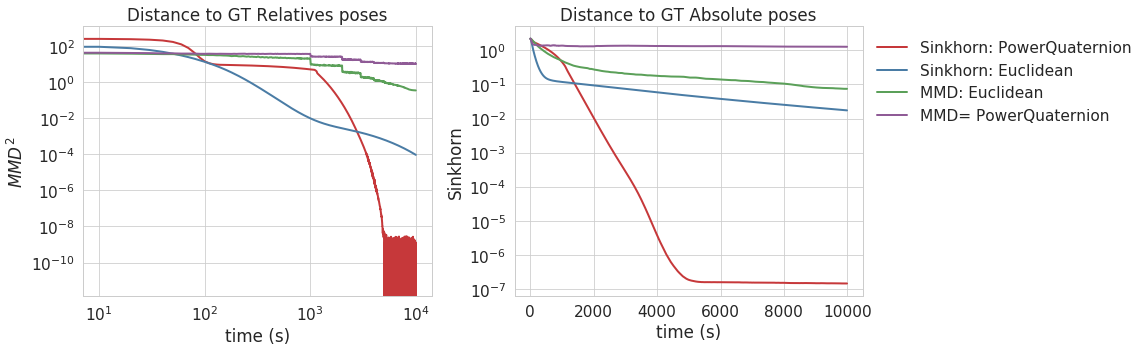

In [9]:
num_fig = 2
fig, ax = plt.subplots(1,num_fig, figsize=(8*num_fig,5))

value = 'loss'
xaxis = 'iteration'
refresh=  False
plot_from_dict(ax[0],res_dicts, xaxis, value, color_dict)
ax[0].set_title('Distance to GT Relatives poses')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$MMD^2$')
ax[0].set_xlabel('time (s)')
#ax[0].legend()

value = 'eval_dist'
xaxis = 'iteration'
plot_from_dict(ax[1],res_dicts, xaxis,  value, color_dict)
ax[1].set_title('Distance to GT Absolute poses')
ax[1].set_xscale('linear')
ax[1].set_yscale('log')
ax[1].set_ylabel('Sinkhorn')
ax[1].set_xlabel('time (s)')
ax[1].legend(bbox_to_anchor=(1., 1.),frameon=False)
fig.tight_layout()
filename = 'loss_sinkhorn_vs_mmd'
save(filename)


In [18]:

#eng.addpath('bingham', nargout=0)
#eng.addpath('bingham/tools', nargout=0)
#eng.addpath('bingham/visualization', nargout=0)

# The quality of the rendering. It is super slow so for testing I always set it to 50 and for the final renderings back to 400!
quality = 50

# Each element of the list is a list of quaternions for the bingham distribution
distributions = []

# random distributions made of quaternions for testing
bingham_1 = [[0.7, 0.3, -0.1, 0.2], [0.6, 0.35, -0.16, 0.15],[0.5, 0.2, -0.4, -0.2], [0.4, 0.1, -0.4, -0.2]]


bingham_2 = [[1, 0, 0, 0], [1, 0., 0, 0]]

# normalize quats
bingham_1 = np.asarray(bingham_1)
bingham_2 = np.asarray(bingham_2)

bingham_1 /= np.linalg.norm(bingham_1, axis=1, keepdims=True)
bingham_2 /= np.linalg.norm(bingham_2, axis=1, keepdims=True)

# adding the distributions to the list and convert them to matlab
distributions.append(matlab.double(bingham_1.tolist()))
distributions.append(matlab.double(bingham_2.tolist()))


# GT if not set to None then a green cross will be superimposed at this position as GT quaternion
# gt = [q_gt, -q_gt]
gt = np.asarray([[0.7, 0.3, -0.1, 0.2], [-0.7, -0.3, 0.1, -0.2]])
gt /= np.linalg.norm(gt, axis=1, keepdims=True)

# plotting!
bingham = db.get_bingham(eng, distributions, GT=None, precision=quality) /255.# without ground truth
bingham_gt = db.get_bingham(eng, distributions, GT=gt, precision=quality) / 255. # with ground truth

#db.fit()

# show on display with and without gt
#cv2.imshow('bingham', cv2.hconcat([bingham, bingham_gt]))
#cv2.waitKey(0)


In [24]:
bingham_1 = [[1, 0, 0, 0], [1, 0., 0, 0]]
distributions= [matlab.double(bingham_1.tolist())]
V,Z,F = eng.bingham_fit(distributions[0],nargout=3)
V = np.array(V)
V

AttributeError: 'list' object has no attribute 'tolist'

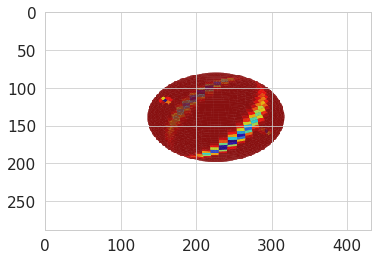

In [33]:
#aa = cv2.hconcat([bingham])
plt.imshow(bingham)




In [17]:
iteration = 0
out_dict0 = get_all_particles(res_path,iteration)
iteration = 9990
out_dict = get_all_particles(res_path,iteration)


In [23]:
aa = 1.*out_dict0['Sinkhorn: PowerQuaternion']['particles']

In [20]:

out_dict0['Sinkhorn: PowerQuaternion']['true_particles'],out_dict['Sinkhorn: PowerQuaternion']['particles']

(array([[[ 1.        ,  0.        ,  0.        ,  0.        ]],
 
        [[ 0.12308678,  0.04335512,  0.42012431,  0.89803427]],
 
        [[ 0.61227123, -0.25446807,  0.47282842,  0.5803475 ]],
 
        [[ 0.57652308,  0.39931042, -0.70330989,  0.11630792]],
 
        [[ 0.02474327, -0.63965807, -0.32711595, -0.69514062]],
 
        [[ 0.50625128, -0.39898011, -0.71740754, -0.26429328]],
 
        [[ 0.09600676, -0.52771042, -0.80174219, -0.26365483]],
 
        [[ 0.60686114, -0.22479689,  0.31377325,  0.69478937]],
 
        [[ 0.41962596,  0.75816295, -0.43197779,  0.24999635]],
 
        [[ 0.6001833 ,  0.08328477,  0.03729164, -0.79464016]],
 
        [[ 0.63260297, -0.24756011,  0.69348245,  0.24001991]],
 
        [[ 0.53328401,  0.73561572,  0.20544853, -0.36368748]],
 
        [[ 0.05336878,  0.23432686,  0.84440916, -0.47876495]],
 
        [[ 0.21254118,  0.84385226,  0.48373301, -0.09349856]],
 
        [[ 0.91138852, -0.16619329,  0.05845595,  0.37193233]],
 
        [[

In [13]:
iterations = [0,10,100,1000,9990]
#iterations = [0,100]
method = 'Sinkhorn: PowerQuaternion'
num_cameras = 4
bingham_fits = make_bg_spheres_from_dict(eng,res_path,iterations,method,num_cameras,GT=False)

True

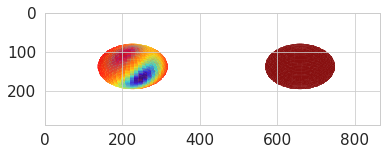

In [12]:
#bingham_fits = list(map(list, zip(*bingham_fits)))
image = concat_tile(bingham_fits)
plt.imshow(image)
#cat_binghams = cv2.vconcat(bingham_fits)
cv2.imwrite('bingham.jpg',image)


In [ ]:
plt.imshow(cat_binghams)